# Контрольное задание по НИС

## Анализ датасета Credit Approval

### Загрузка данных

In [3]:
!pip install wget
!pip install ucimlrepo


In [6]:
#загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget
from ucimlrepo import fetch_ucirepo

# загрузим данные
credit_approval = fetch_ucirepo(id=27)

# датасет в формате  pandas dataframes
data = credit_approval.data.original
# metadata
print(credit_approval.metadata)

{'uci_id': 27, 'name': 'Credit Approval', 'repository_url': 'https://archive.ics.uci.edu/dataset/27/credit+approval', 'data_url': 'https://archive.ics.uci.edu/static/public/27/data.csv', 'abstract': 'This data concerns credit card applications; good mix of attributes', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 690, 'num_features': 15, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['A16'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1987, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C5FS30', 'creators': ['J. R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.\r\n  \r\nThis dataset is interesting because there is a good mix of attributes --

Рассмотрим переменные датасета и информацию о данных

In [ ]:
credit_approval.variables

,name,role,type,demographic,description,units,missing_values
0,A16,Target,Categorical,None,None,None,no
1,A15,Feature,Continuous,None,None,None,no
2,A14,Feature,Continuous,None,None,None,yes
3,A13,Feature,Categorical,None,None,None,no
4,A12,Feature,Categorical,None,None,None,no
5,A11,Feature,Continuous,None,None,None,no
6,A10,Feature,Categorical,None,None,None,no
7,A9,Feature,Categorical,None,None,None,no
8,A8,Feature,Continuous,None,None,None,no
9,A7,Feature,Categorical,None,None,None,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [ ]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


### Первичный аналих данных

Расммотрим распределение результатов: одобрение(+) / неодобрение(-)

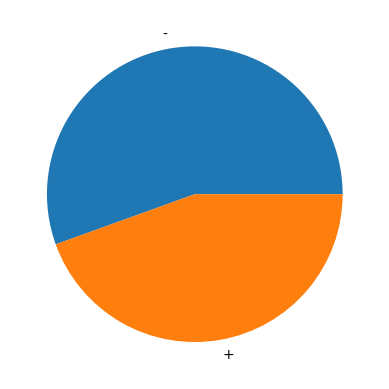

In [ ]:
y =data['A16']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Рассмотрим значения столбцов с числами

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A2,678.0,31.568171,11.957862,13.75,22.6025,28.46,38.2300,80.25
A3,690.0,4.758725,4.978163,0.00,1.0000,2.75,7.2075,28.00
A8,690.0,2.223406,3.346513,0.00,0.1650,1.00,2.6250,28.50
A11,690.0,2.400000,4.862940,0.00,0.0000,0.00,3.0000,67.00
A14,677.0,184.014771,173.806768,0.00,75.0000,160.00,276.0000,2000.00
A15,690.0,1017.385507,5210.102598,0.00,0.0000,5.00,395.5000,100000.00


Рассмотрим распределение значений столбцов с строками(буквами)

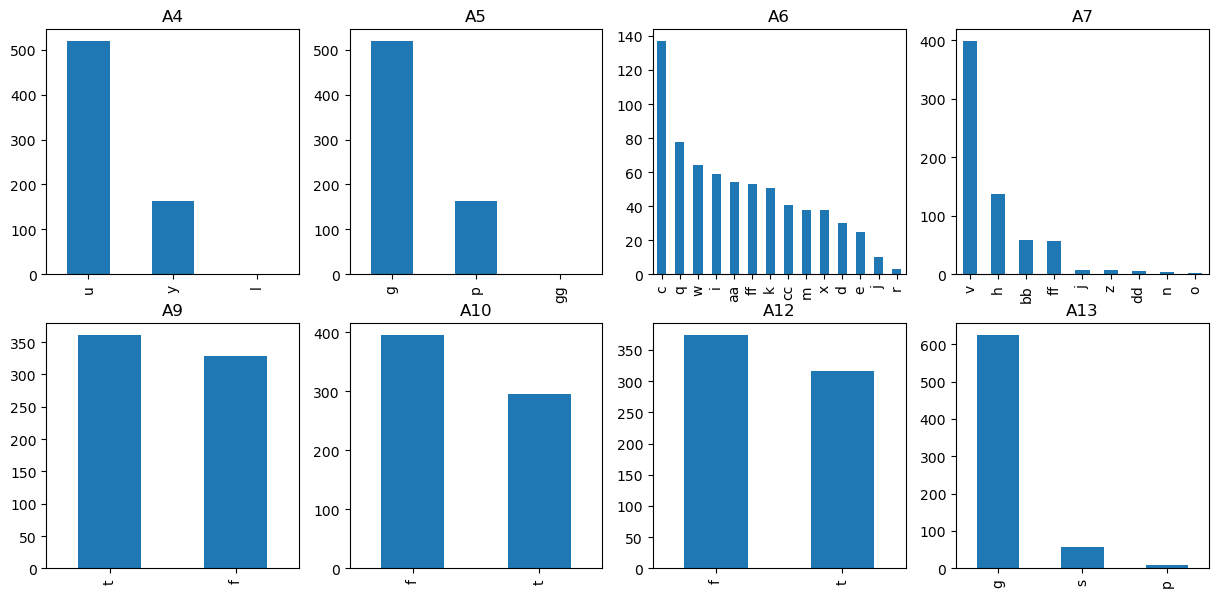

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(15, 7))

#распределение для A4
data['A4'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_ylabel('')
axs[0, 0].set_title('A4')

#распределение для A5
data['A5'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_ylabel('')
axs[0, 1].set_title('A5')

#распределение для A6
data['A6'].value_counts().plot(kind='bar', ax=axs[0, 2])
axs[0, 2].set_ylabel('')
axs[0, 2].set_title('A6')

#распределение для A7
data['A7'].value_counts().plot(kind='bar', ax=axs[0, 3])
axs[0, 3].set_ylabel('')
axs[0, 3].set_title('A7')

#распределение для A9
data['A9'].value_counts().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_ylabel('')
axs[1, 0].set_title('A9')

#распределение для A10
data['A10'].value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_ylabel('')
axs[1, 1].set_title('A10')

#распределение для A12
data['A12'].value_counts().plot(kind='bar', ax=axs[1, 2])
axs[1, 2].set_ylabel('')
axs[1, 2].set_title('A12')

#распределение для A13
data['A13'].value_counts().plot(kind='bar', ax=axs[1, 3])
axs[1, 3].set_ylabel('')
axs[1, 3].set_title('A13')

plt.show()



Изобразим гистограммы для понимания диапазонов числовых данных

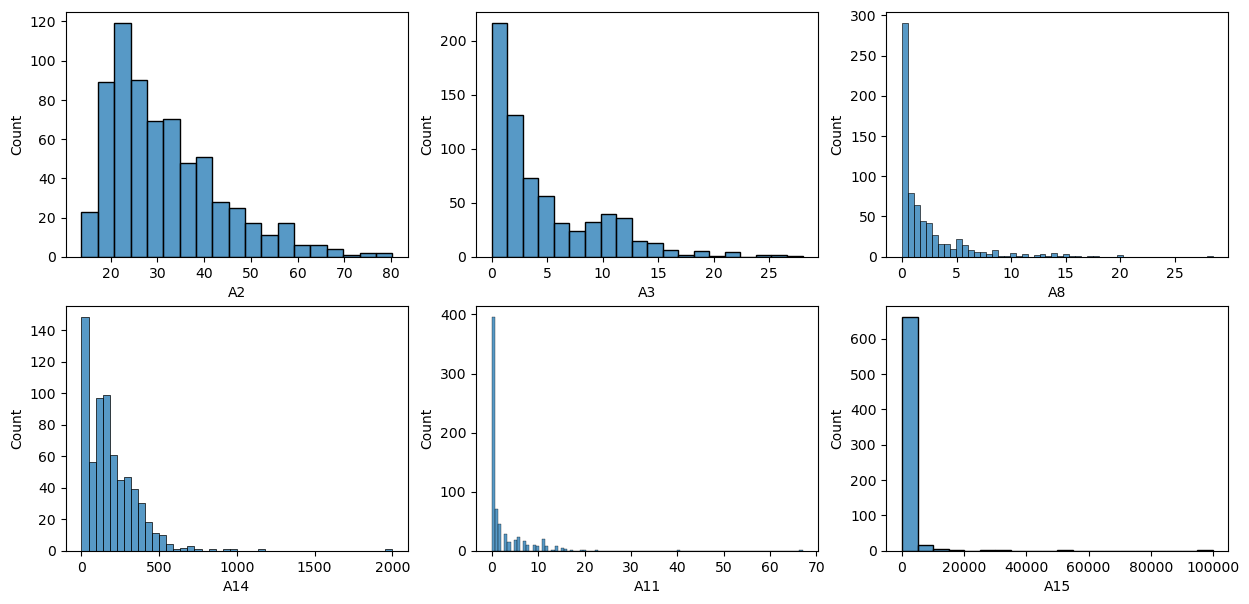

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

sns.histplot(data=data['A2'], ax=axes[0, 0])
sns.histplot(data=data['A3'], ax=axes[0, 1])
sns.histplot(data=data['A8'], ax=axes[0, 2])

sns.histplot(data=data['A14'], ax=axes[1, 0])
sns.histplot(data=data['A11'], ax=axes[1, 1])
sns.histplot(data=data['A15'], bins=20, ax=axes[1, 2])

# Add labels if desired
axes[0, 0].set_xlabel('A2')
axes[0, 1].set_xlabel('A3')
axes[0, 2].set_xlabel('A8')
axes[1, 0].set_xlabel('A14')
axes[1, 1].set_xlabel('A11')
axes[1, 2].set_xlabel('A15')

plt.show()


Изобразим на графике, как связаны между собой различные признаки, c распределением по одобрению

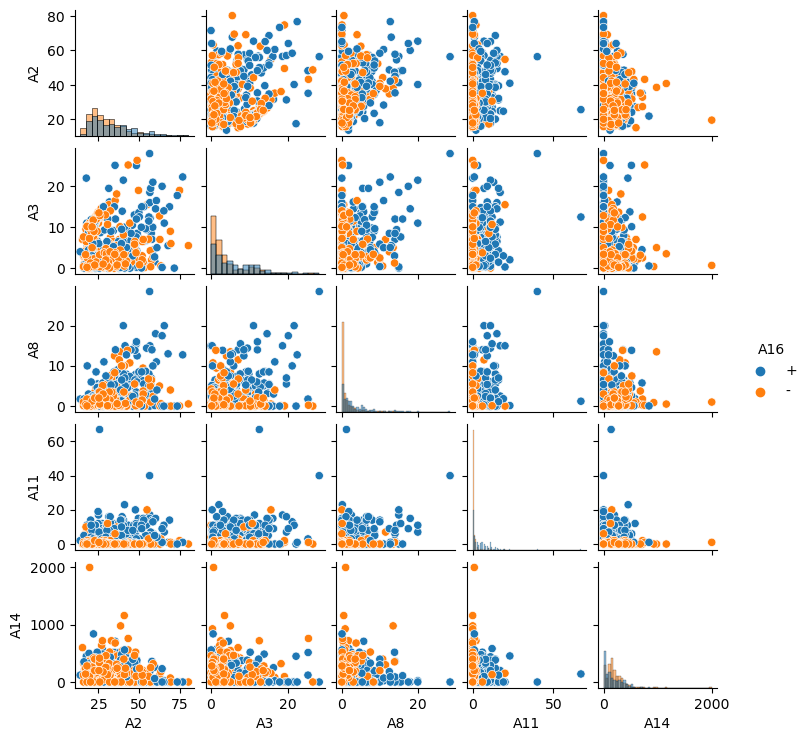

In [ ]:
%config InlineBackend.figure_format = 'png'
g=sns.pairplot(data, hue='A16', vars=['A2', 'A3', 'A8',
                 'A11', 'A14'],  diag_kind="hist", height=1.5)

**Корреляция**  — математический показатель, по которому можно судить, есть ли статистическая взаимосвязь между

случайными величинами. Если такая связь существует, изменения значений одной величины  

влияют на другую.


**Коэффициент корреляции** показывает, насколько велика взаимосвязь. Обозначается символами $R$ или $r$ и может

принимать значения от -1 до 1 включительно.

Изобразим тепловую карту чтобы показать корреляцию между данными

/var/folders/9l/2k5n1r5s3zz5dw3_0qwhs7100000gn/T/ipykernel_93443/1134651311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)


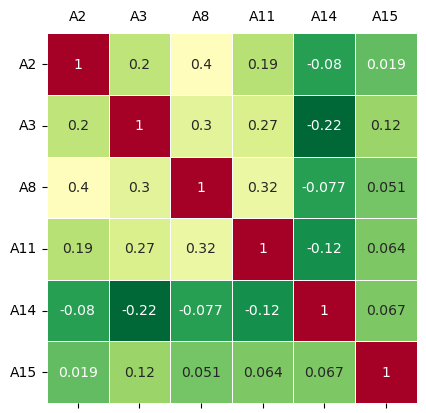

In [ ]:
ax = sns.heatmap(data.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
plt.show()

### Правка датасета

Обычно когда мы рассматриваем данные, удобно понимать с чем именно ведется работа, чтобы во время работы интуитивно понимать, что происходит, и делать выводы на основе результатов. К сожалению информация в этом датасете зашифрована в целях конфиденциальности. Так что проведенный короткий анализ данных - важная информация.

Прежде чем строить модели можно отметить, что кроме зашифрованности данных есть еще проблема неполноты информации, не все столбцы полностью заполнены

Это проблему можно решать различными методами

*  Удаление строк или столбцов
*  Заполнение средними значениями или медианой
*  Замену пропущенных значений нулями и добавление специального атрибута-индикатора, принимающего нулевые значения для записей, где данные изначально не содержали пропусков, и ненулевые значения там, где ранее были пропуски
*  Метод заполнения вперед (forward fill) или назад (backward fill)
*  Восстановление пропусков на основе регрессионных моделей

Для того чтобы понять, значительность проблемы и найти подходящее решение, рассмотрим частоту с которой пропуски встречаются

In [7]:
has_missing_values = ['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14']
for i in has_missing_values:
    missing_values = data[i].isnull().sum()
    total_values = data[i].count()
    y = missing_values/total_values
    print('Процент пропущенных данных для столбца {0} : {1}'.format(i, '%.3f' % y))

Процент пропущенных данных для столбца A1 : 0.018
Процент пропущенных данных для столбца A2 : 0.018
Процент пропущенных данных для столбца A4 : 0.009
Процент пропущенных данных для столбца A5 : 0.009
Процент пропущенных данных для столбца A6 : 0.013
Процент пропущенных данных для столбца A7 : 0.013
Процент пропущенных данных для столбца A14 : 0.019


Хотя для каждого столбца процент невысокий, из за большого колличество неполностью заполненных столбцов, удаление строк содержащих незаполнение кажется не лучшей стратегией. Вместо этого можно воспользоваться функцией ffill(), заполняющей пропуски значениями на основе предыдущих.

In [8]:
data = data.ffill() #заполнили
# проведем проверку что в датасете не осталось незаполненных полей
has_missing_values = ['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14']
for i in has_missing_values:
    missing_values = data[i].isnull().sum()
    if missing_values==0:
        print("OK for", i)
    else:
        print("Missing values in", i)

OK for A1
OK for A2
OK for A4
OK for A5
OK for A6
OK for A7
OK for A14


Другая проблема состоит в том, что не все данные - числовые. При построении модели для удобства все нечисловые значения переведем в числовые

In [10]:
from sklearn.preprocessing import LabelEncoder
data_columns = data.columns.values
sc_X = LabelEncoder() #кодировщик для преобразования категориальных или текстовых данных в числа
for c in data_columns:
    if data[c].dtypes=='object': #для каждого столбца проверяем в каком он формате
        data[c]=sc_X.fit_transform(data[c]) #если нужно изменяем
#проверка что все теперь хорошо
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 86.4 KB


Рассмотрим полученные данные

In [11]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750,1


Можно увидеть, что там где раньше стоял + теперь стоит 0, где - теперь стоит 1, то есть теперь 0 соответсвует согласие, 1 - отказ.

Кроме того полезно рассмотреть в каких диапозонах лежат новые числовые данные, это поможет правильно трактовать результаты анализа.

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A1,690.0,0.689855,0.462888,0.00,0.000,1.000,1.0000,1.00
A2,690.0,31.483058,11.912872,13.75,22.580,28.375,37.7500,80.25
A3,690.0,4.758725,4.978163,0.00,1.000,2.750,7.2075,28.00
A4,690.0,1.234783,0.430959,0.00,1.000,1.000,1.0000,2.00
A5,690.0,0.478261,0.852022,0.00,0.000,0.000,0.0000,2.00
A6,690.0,5.781159,4.279420,0.00,1.000,6.000,10.0000,13.00
A7,690.0,5.069565,2.515745,0.00,3.000,7.000,7.0000,8.00
A8,690.0,2.223406,3.346513,0.00,0.165,1.000,2.6250,28.50
A9,690.0,0.523188,0.499824,0.00,0.000,1.000,1.0000,1.00
A10,690.0,0.427536,0.495080,0.00,0.000,0.000,1.0000,1.00
